# Analysis of marketing campaigns for an educational institute

1. Data preparation & Baseline questions
2. EDA
3. KPI

**Data preparation**
- Importing libraries
- Importing data
- Baseline questions
- Data cleaning

In [320]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [321]:
# Import data
marketing = pd.read_csv('marketing.csv' )

In [322]:
# Ptint first two column
marketing.head(2)

,user_id,date_served,marketing_channel,variant,language_displayed,language_preferred,age_group,date_subscribed,date_canceled
0,a100000029,1/1/2018,Youtube,personalization,English,English,0-18 years,1/1/2018,NaN
1,a100000030,1/1/2018,Youtube,personalization,English,English,19-24 years,1/1/2018,NaN


In [323]:
# Generate descriptive statistics on data
marketing.describe(include='all')

,user_id,date_served,marketing_channel,variant,language_displayed,language_preferred,age_group,date_subscribed,date_canceled
count,9591,9591,9591,9591,9591,9591,9591,1050,349
unique,9591,31,5,2,4,4,7,31,113
top,a100000029,1/15/2018,Youtube,control,English,English,19-24 years,1/16/2018,1/11/2018
freq,1,432,4724,4801,9358,8915,1617,102,7


In [324]:
# Hinit: You can use .unique() to get unique values of a column
#marketing['marketing_channel'].unique()

Baseline questions

1. user_id :has duplicate values.
2. date_served: Does a marketing campaigns reach customers equally each day? and Is it equal among the different segments group?
3. marketing_channel: Which is the best marketing channel? 
4. variant: Do personalized campaigns is the best?
5. language_displayed & language_displayed: Which is the best language?
6. age_group: Which is the best age group?
7. date_subscribed: Is there a trend in time periods for a subscription?
8. date_canceled: Is there a trend in time periods for a canceled subscription? and Which customer segment has the best retention rate?
9. Are there bugs during the marketing campaigns?


Data clenaning

In [325]:
# Print general information about the data
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9591 entries, 0 to 9590
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             9591 non-null   object
 1   date_served         9591 non-null   object
 2   marketing_channel   9591 non-null   object
 3   variant             9591 non-null   object
 4   language_displayed  9591 non-null   object
 5   language_preferred  9591 non-null   object
 6   age_group           9591 non-null   object
 7   date_subscribed     1050 non-null   object
 8   date_canceled       349 non-null    object
dtypes: object(9)
memory usage: 674.5+ KB


- As we saw the date columns are in object format, we need to convert them to datetime format.

In [326]:
# Convert date columns to date type
marketing['date_served'] = pd.to_datetime(marketing['date_served'])
marketing['date_subscribed'] = pd.to_datetime(marketing['date_subscribed'])
marketing['date_canceled'] = pd.to_datetime(marketing['date_canceled'])

**EDA**

The best practice for exploring the data is to divide the columns into groups of the same type.

In [327]:
# category columns
categorycolumns = [column for column in marketing.columns 
                        if marketing.dtypes[column] == 'object'
                          and
                            marketing[column].nunique() < 8 ]

In [328]:
# Show variety in each column.
def categories_summary (columns):
    for column in columns:
        print(marketing[column].value_counts())
        print("---------------------------------")

In [329]:
categories_summary (categorycolumns)

Youtube      4724
Instagram    1842
Facebook     1836
LinkedIn      978
Email         211
Name: marketing_channel, dtype: int64
---------------------------------
control            4801
personalization    4790
Name: variant, dtype: int64
---------------------------------
English    9358
Spanish     128
German       81
Arabic       24
Name: language_displayed, dtype: int64
---------------------------------
English    8915
Spanish     401
German      161
Arabic      114
Name: language_preferred, dtype: int64
---------------------------------
19-24 years    1617
24-30 years    1498
0-18 years     1474
45-55 years    1291
30-36 years    1288
36-45 years    1285
55+ years      1138
Name: age_group, dtype: int64
---------------------------------


- As we saw the marketing campaigns on Youtube have the highest number of campaigns. Is it good?
- Comparing the language displayed to the preferred language shows many differences. Is there a bug?

In [330]:
# dates columns: 
datescolumns = [column for column in marketing.columns 
                        if marketing.dtypes[column] == 'datetime64[ns]']  

In [331]:
# It is challenging to interpret daily trends by looking at a table. 
#To make it easier we will visualize the results using a line plot.
def dates_summary (columns):
    for column in columns:
        plt.figure(figsize=(12,4))
        marketing.groupby([column])['user_id'].nunique().plot()
        plt.title(column)
        plt.show()

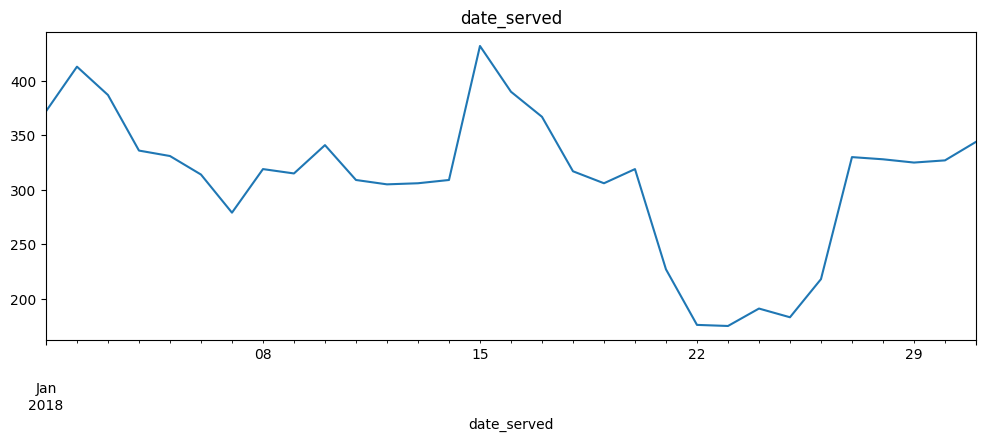

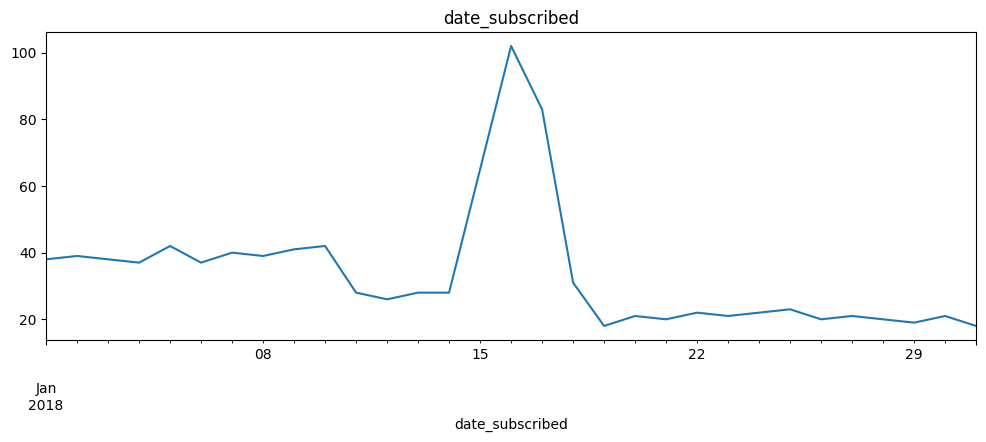

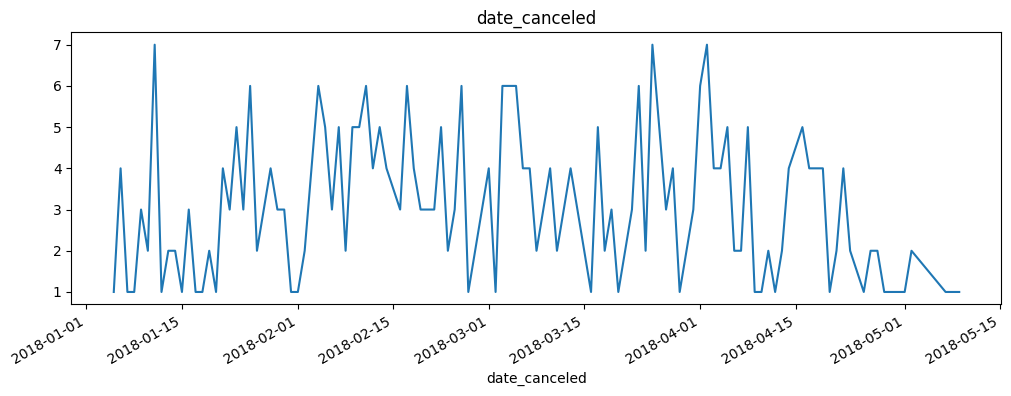

In [332]:
dates_summary(datescolumns)

- The biggest rate of reached customers was on 15th Jan. On the other hand, the biggest subscribers were on 16th Jan. Is it logical?
- The lowest rate of reached customers was between 20th Jan to 27th. Despite that, the subscriber's number was not affected. Is it good?

To understand the dates columns let's break them down by categories column

In [333]:
# Date_served ,date_subscribed and category columns
def dates_categories_summary (columns):
    for column in columns:
        
        f, axes = plt.subplots(2)
        f.set_figwidth(15)
        f.suptitle(column , fontsize=16 , fontweight='bold' , style='italic' , verticalalignment= 'top' ,  color='red')
        plt.subplots_adjust(bottom =0.1 , hspace=0.5)

        
        served = marketing.groupby([ 'date_served',column])['user_id'].nunique().unstack(level=1)
        axes[0].plot(served)
        axes[0].set_title('date_served')
        axes[0].legend(labels = served.columns , loc  = 'right')
        
        subscribed = marketing.groupby([ 'date_subscribed',column])['user_id'].nunique().unstack(level=1)
        axes[1].plot(subscribed)
        axes[1].set_title('date_subscribed')
        axes[1].legend(labels = subscribed.columns , loc  = 'right')

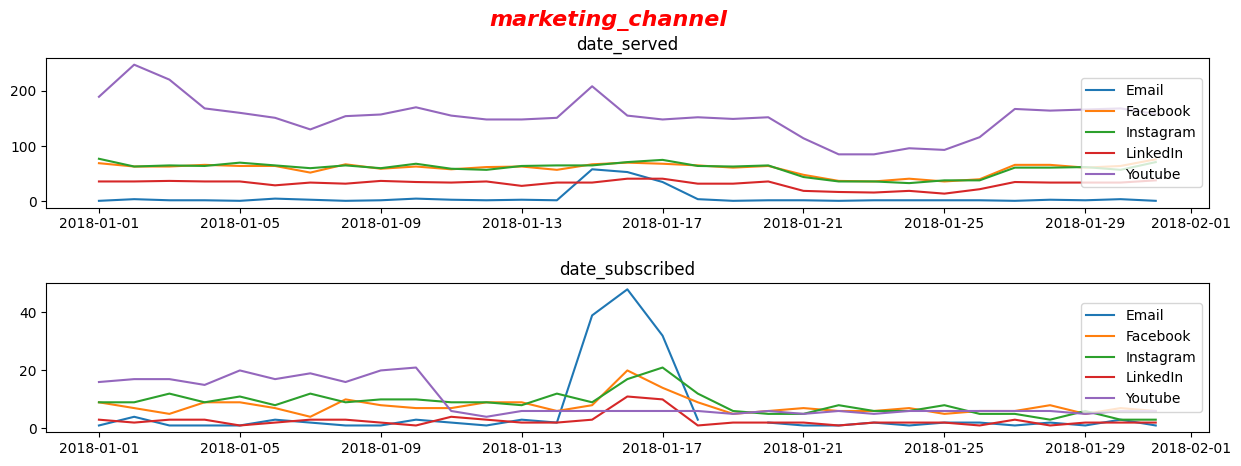

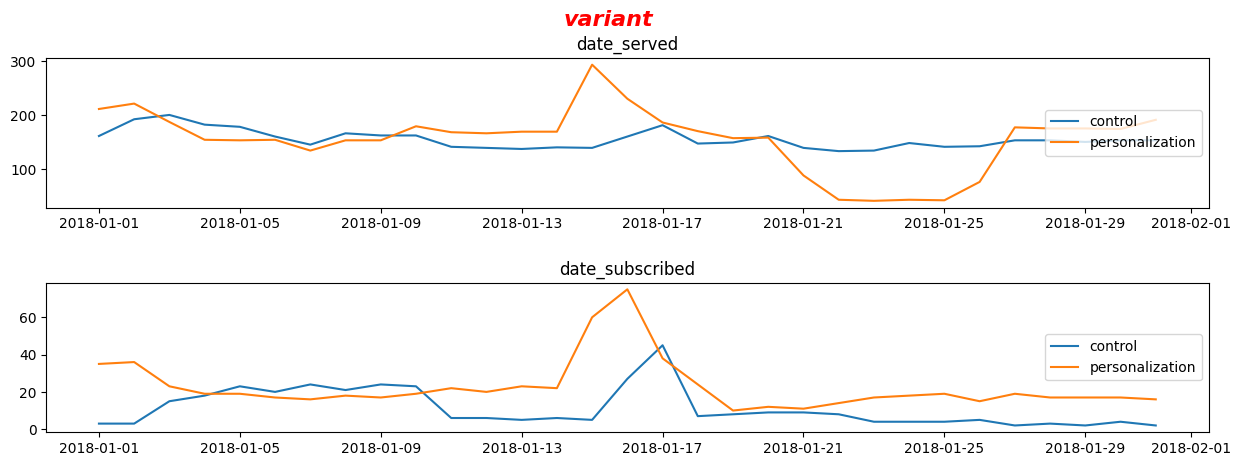

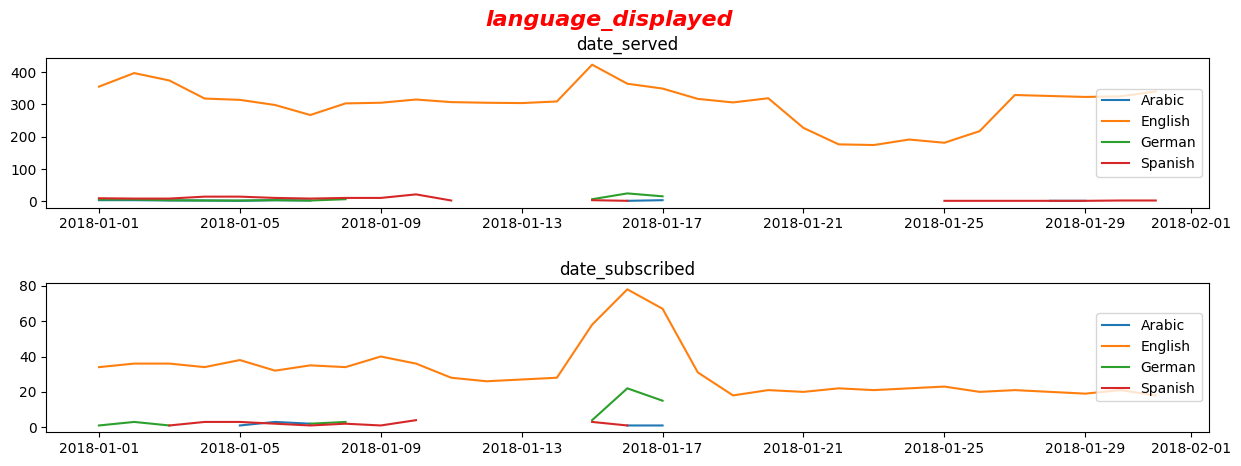

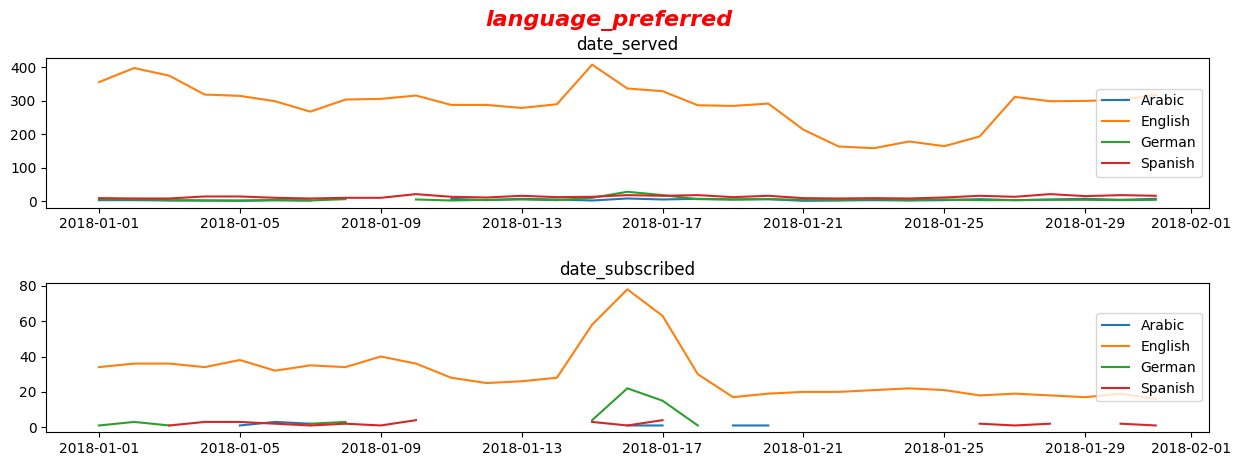

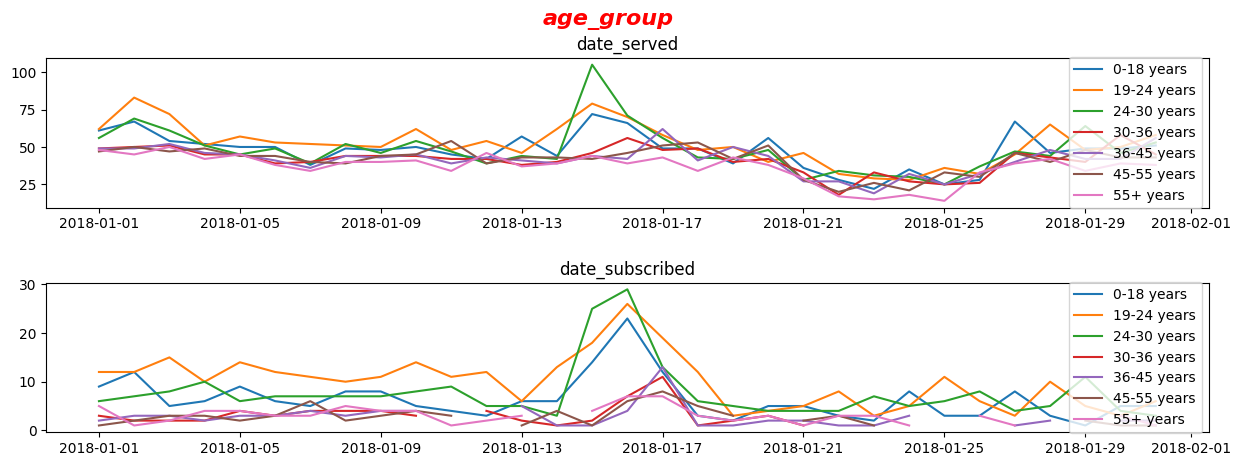

In [334]:
dates_categories_summary (categorycolumns)

There are potential bugs in Youtube marketing campaigns starting on 11th Jan accompanied by bugs in displayed language

Let's investigate them in the next part

**KPI**

Using KPIs is the best practice for investigating inconsistencies that occurred and their influence on the performance of marketing efforts.
The main KPIs we will use are :
1. Conversion rate: One of the best ways to determine how effective a marketing team was at gaining new customers.
2. Retention rate: This can give you a sense of whether your marketing campaign converted subscribers who were actually interested in the product.

Conversion rate and retention rate hand-in-hand; you could create a business with a high conversion rate by giving users a free trial, but have a low retention rate once users are charged for your services. This isn't inherently a bad thing, but it is important to provide your business stakeholders with insight into what percentage of users remain subscribers.

**Conversion rate**

In [335]:
# Add the new column converted
marketing['converted'] = np.where(marketing['date_subscribed'].isnull(), False, True)

In [336]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing['converted']== True ]['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers / total
print(round(conversion_rate*100, 2), "%")

10.95 %


**Retention rate**

In [337]:
# Add the new column is_retained
marketing['is_retained'] = np.where((marketing['converted'] == True ) & (marketing['date_canceled'].isnull()) ,True,False)

In [338]:
# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained']== True ]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/subscribers

print(round(retention_rate*100, 2), "%")

66.76 %


Which Marketing channels has the best retention rate.

It's important to identify how each marketing channel is performing because this will affect company strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.

In [339]:
# Table View
Marketing_retention_rate_total = marketing[marketing['is_retained']== True].groupby(['marketing_channel'])['user_id'].nunique() 
Marketing_conversation_rate_total = marketing[marketing['converted']== True].groupby(['marketing_channel'])['user_id'].nunique()
Marketing_retention_rate = (Marketing_retention_rate_total/Marketing_conversation_rate_total)*100
Marketing_retention_rate

marketing_channel
Email        73.652695
Facebook     70.042194
Instagram    68.301887
LinkedIn     69.879518
Youtube      58.053691
Name: user_id, dtype: float64

In [340]:
Marketing_retention_rate_total

marketing_channel
Email        123
Facebook     166
Instagram    181
LinkedIn      58
Youtube      173
Name: user_id, dtype: int64

In [341]:
Marketing_conversation_rate_total

marketing_channel
Email        167
Facebook     237
Instagram    265
LinkedIn      83
Youtube      298
Name: user_id, dtype: int64

Can we make recommendations to increase investment in Email compagins?

If we want to calculate the retention rate by each customer segment we will be doing a lot of repetitive calculations.

Anytime you notice repetition in your work, consider automation.

The more of the low-variance work you can automate, the more time you will have to explore new and interesting data science topics at work.



**Customer segmentation**

Common ways to segment audiences:
                <li>Age</li>
                <li>Gender</li>
                <li>Location</li>
                <li>Past interaction(s) with the business</li>
                <li>Marketing channels users interacted with</li>


Is a good practice to build a functions

**Building functions to automate analysis**

In [342]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']== True].groupby(column_names)['user_id'].nunique()
    # Total number users
    column_total =  dataframe.groupby(column_names)['user_id'].nunique()
    # Conversion rate 
    conversion_rate = column_conv/column_total
    # Fill missing values with 0
    conversion_rate = conversion_rate.replace (np.nan , 0)
    return conversion_rate

In [343]:
# تكرار التسويق مؤشر حلو

In [344]:
# Building a retention function
def retention_rate(dataframe, column_names):
    # Group by column_names and calculate retention
    retained = dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()
    # Group by column_names and calculate conversion
    converted = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()
    retention_rate = retained/converted
    return retention_rate

In [345]:
marketing.head (2)

,user_id,date_served,marketing_channel,variant,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,converted,is_retained
0,a100000029,2018-01-01,Youtube,personalization,English,English,0-18 years,2018-01-01,NaT,True,True
1,a100000030,2018-01-01,Youtube,personalization,English,English,19-24 years,2018-01-01,NaT,True,True


In [346]:
r = retention_rate( marketing, 'age_group')
r

age_group
0-18 years     0.664975
19-24 years    0.693548
24-30 years    0.672269
30-36 years    0.666667
36-45 years    0.602740
45-55 years    0.594595
55+ years      0.686747
Name: user_id, dtype: float64

In [347]:
#Plotting fucntion
def plotting(dataframe , Title):
    for column in dataframe:
        # plot size
        plt.figure(figsize=(12,4))

        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])

        # Add titles and labels
        plt.title('Daily ' + column + f' {Title}\n', size = 16)

        # Y-axis labels
        plt.ylabel(f'{Title} (%)', size = 14)

        # X-axis labels
        plt.xlabel('Date', size = 14)
        plt.show()

هون الكستمر سيجمنت

In [348]:
daily_conversion = conversion_rate(marketing, ['date_served' , 'marketing_channel']).unstack(level=1)

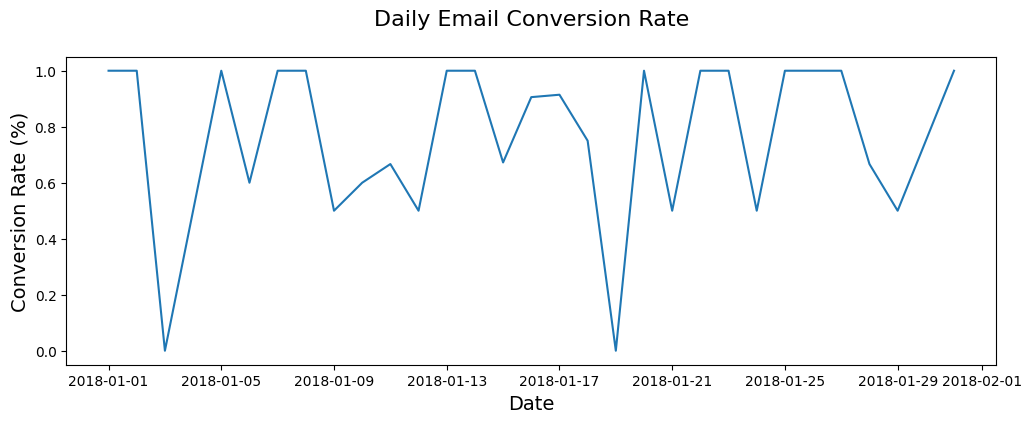

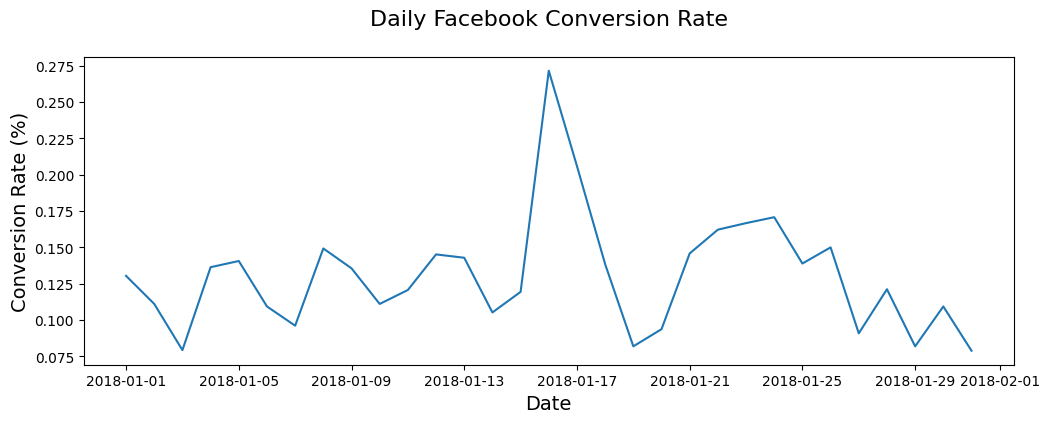

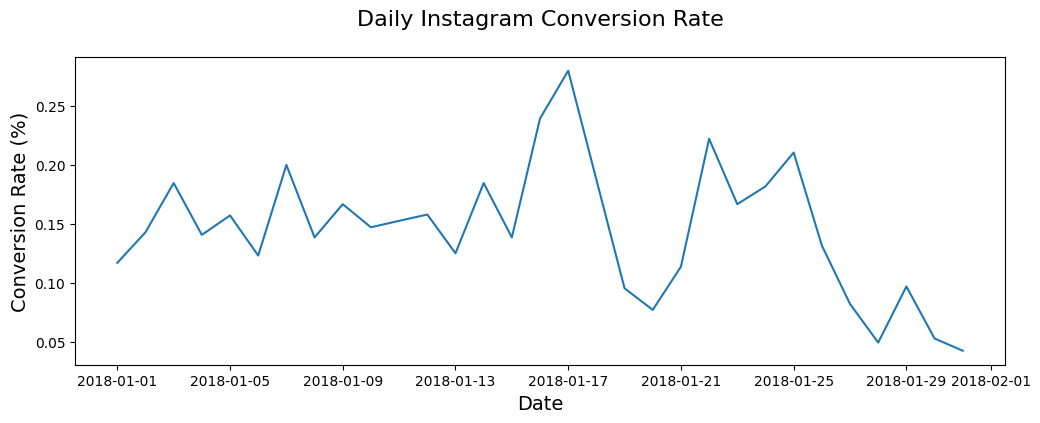

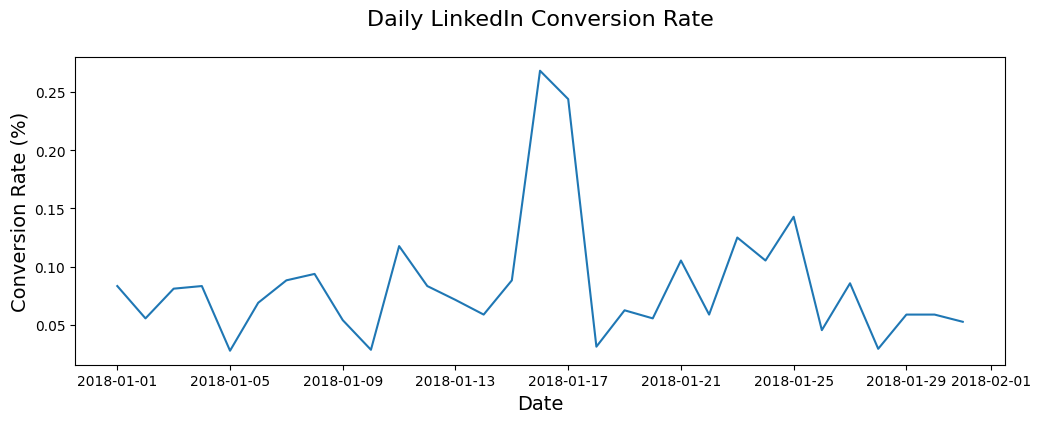

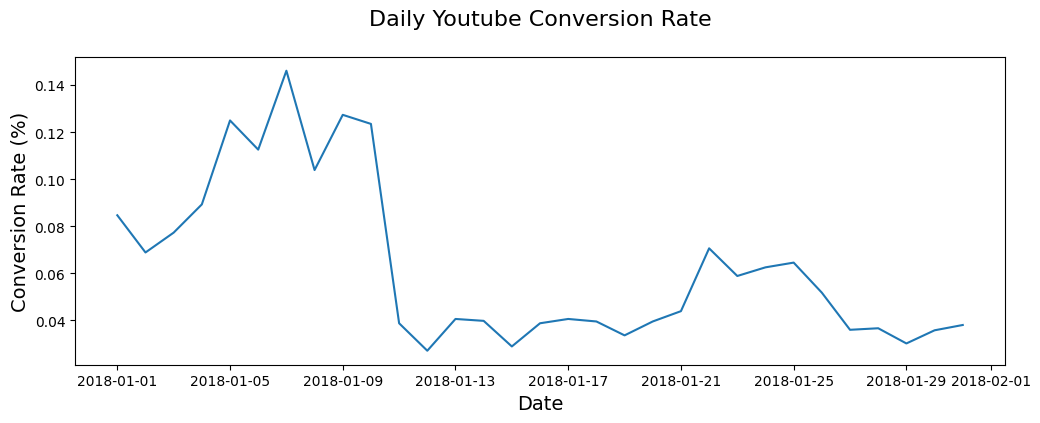

In [349]:
plotting(daily_conversion , 'Conversion Rate')

let's investigate more about Youtube marketing campaigns.

Perhaps the new marketing campaign does not apply broadly across different cultures.

In [350]:
Youtube_df = marketing[marketing['marketing_channel'] == 'Youtube']
daily_conversion = conversion_rate(Youtube_df, ['date_served' , 'language_displayed']).unstack(level=1)
daily_conversion

language_displayed,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,1.0,0.075145,0.200000,0.000000
2018-01-02,0.0,0.060606,0.600000,0.000000
2018-01-03,0.0,0.072464,0.333333,0.125000
2018-01-04,0.0,0.080000,0.000000,0.214286
2018-01-05,NaN,0.117241,0.000000,0.214286
2018-01-06,1.0,0.088235,0.000000,0.200000
2018-01-07,1.0,0.118644,1.000000,0.125000
2018-01-08,NaN,0.079710,0.500000,0.200000
2018-01-09,NaN,0.129252,NaN,0.100000


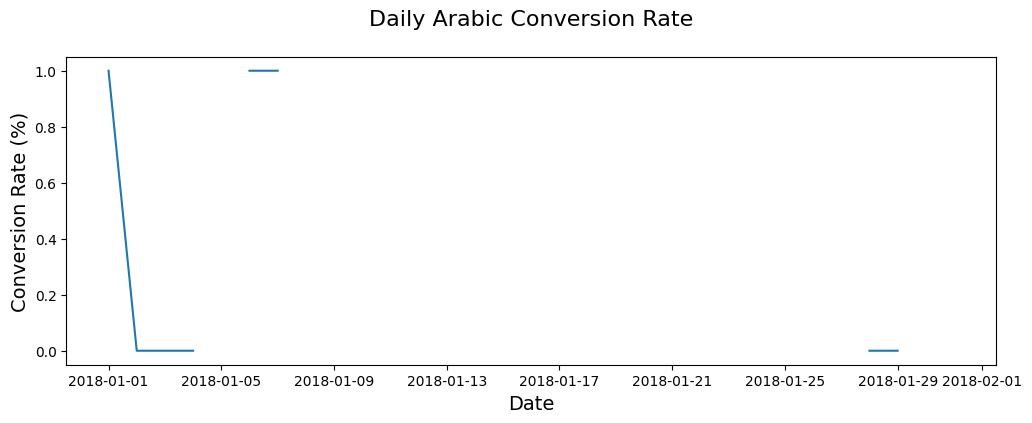

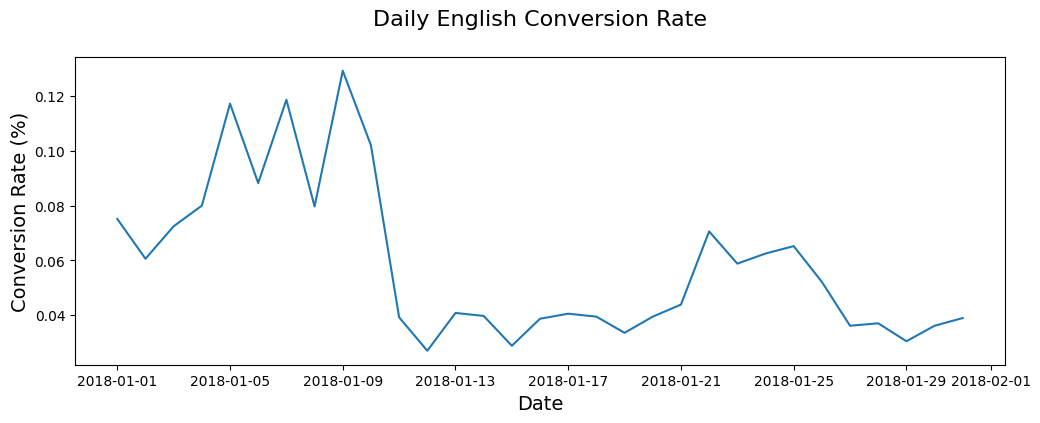

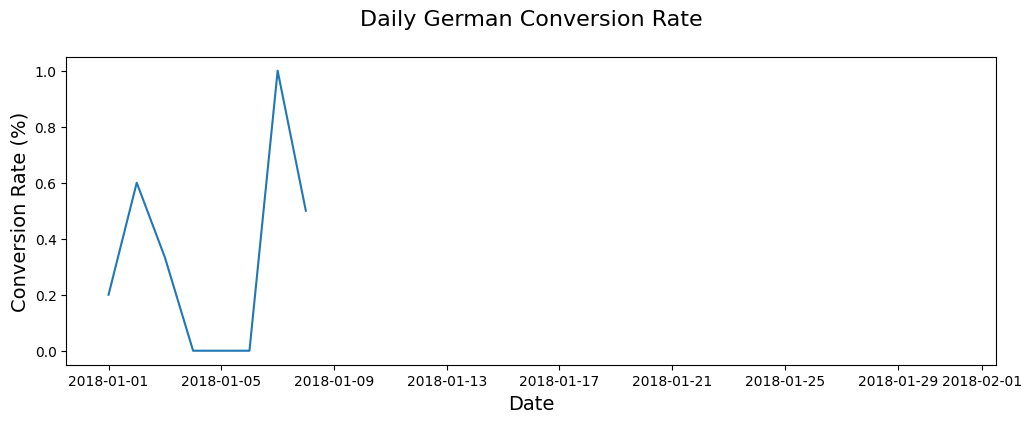

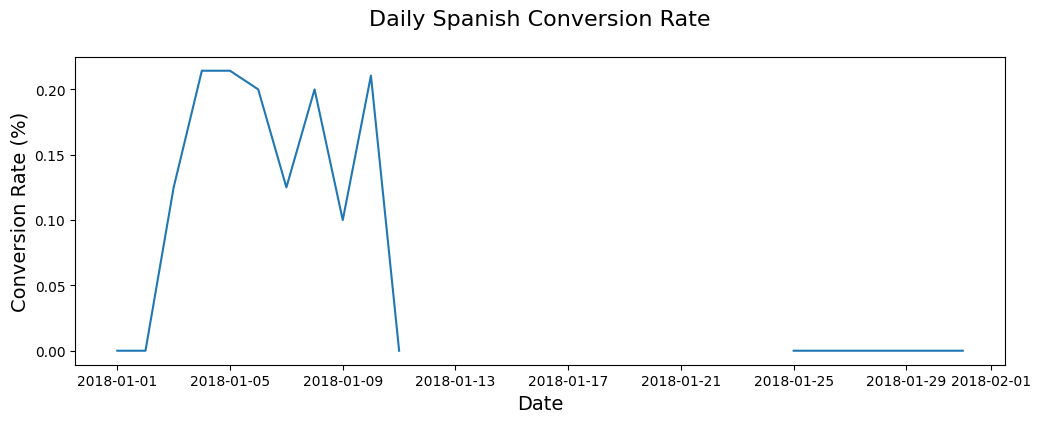

In [351]:
plotting(daily_conversion , 'Conversion Rate')

We are now more certain that there is a bug with the language displayed in the YouTube campaigns, starting from the 11th Jan.

Ideally, the marketing team will consider cultural differences prior to launching a campaign, but sometimes mistakes are made, and it will be your job to identify the cause. Often data scientists are the first line of defense to determine what went wrong with a marketing campaign. It's your job to think creatively to identify the cause.

**Marketing campaigns on YouTube**

In [352]:
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(marketing['language_displayed']== marketing['language_preferred'],'Yes' ,'No')
# print (marketing.columns)

In [353]:
# Filter the dataframe to only include marketing channels
Youtube_df = marketing[marketing['marketing_channel'] == 'Youtube']

In [354]:
# Groupby date_served and correct_language
language_check = Youtube_df.groupby(['date_served','is_correct_lang'])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        0.0  189.0
2018-01-02        0.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        0.0  151.0
2018-01-07        0.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


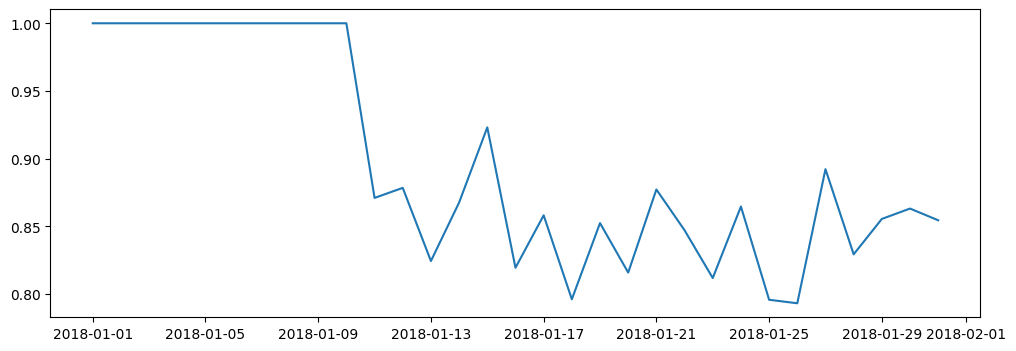

In [355]:
# Plot the results
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis = 1)
plt.figure(figsize=(12,4))
# Plot and show your results
plt.plot(language_check_df.index, language_check_df['pct'] )
plt.show()

**Estimating conversion rate**

While you cannot ignore data related to errors in the campaign, 
you can estimate what conversion might have looked like if there had been no issues. 

Setps:
1. Calculate the conversion rate for each language before the bug (< 2018-01-11 ).
2. Index other language conversion rate against English
3. Create actual conversion DataFrame and unstack it
4. Create English conversion number column for affected period (2018-01-11:2018-01-31)
5. Create expected conversion rates for each language (Multiply English conversion rate by language indexs)
6. Multiply total ads served by expected conversion rate
7. Calculate the difference between actual and expected conversion rates

In [356]:
# 1: Calculate the conversion rate for each language before the bug (< 2018-01-11 ).
Youtube_ads_no_bug = Youtube_df[Youtube_df['date_served'] < '2018-01-11']
lang_conv = conversion_rate(Youtube_ads_no_bug,['language_displayed'])
lang_conv

language_displayed
Arabic     0.500000
English    0.089196
German     0.400000
Spanish    0.154545
Name: user_id, dtype: float64

In [357]:
# 2. Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

In [358]:
# Interpreting Indexes
print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)


Spanish index: 1.732650448143406
Arabic index: 5.605633802816902
German index: 4.484507042253521


Spanish-speaking users typically convert 1.7 times the rate of English-speakers

In [359]:
# 3. Create actual conversion DataFrame and unstack it
language_conversion = Youtube_df.groupby(['date_served', 'language_preferred']).agg({'user_id':'nunique','converted':'sum'})
expected_conversion = pd.DataFrame(language_conversion.unstack(level=1))
expected_conversion.head(2)

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   173.0    5.0     9.0       2.0    13.0    1.0   
2018-01-02             3.0   231.0    5.0     8.0       0.0    14.0    3.0   

                            
language_preferred Spanish  
date_served                 
2018-01-01             0.0  
2018-01-02             0.0

In [360]:
# 4. Create English conversion number column for affected period (2018-01-11:2018-01-31)
expected_conversion['actual_english_conversions'] = expected_conversion.loc['2018-01-11':'2018-01-31'][('converted','English')] / expected_conversion.loc['2018-01-11':'2018-01-31'][('user_id','English')]

In [361]:
# 5. Create expected conversion rates for each language (Multiply English conversion rate by language indexs)
expected_conversion['expected_spanish_rate'] = expected_conversion['actual_english_conversions']*spanish_index
expected_conversion['expected_arabic_rate'] = expected_conversion['actual_english_conversions']*arabic_index
expected_conversion['expected_german_rate'] = expected_conversion['actual_english_conversions']*german_index

In [362]:
# 6. Multiply total ads served by expected conversion rate
expected_conversion['expected_spanish_conversions'] = expected_conversion['expected_spanish_rate']* expected_conversion[('user_id','Spanish')]
expected_conversion['expected_arabic_conversions'] = expected_conversion['expected_arabic_rate']*expected_conversion[('user_id','Arabic')]
expected_conversion['expected_german_conversions'] = expected_conversion['expected_german_rate']*expected_conversion[('user_id','German')]

In [363]:
# 7. Calculate the difference between actual and expected conversion rates
bug_period = expected_conversion.loc['2018-01-11':'2018-01-31']
# Sum expected subscribers for each language
expected_subs = bug_period['expected_spanish_conversions'].agg('sum') + bug_period['expected_arabic_conversions'].agg('sum') + bug_period['expected_german_conversions'].agg('sum')

# Calculate how many subscribers we actually got
actual_subs = bug_period[('converted','Spanish')].sum() + bug_period[('converted','Arabic')].agg('sum') + bug_period[('converted','German')].agg('sum')
lost_subs = expected_subs - actual_subs
print(round(lost_subs ,0))

27.0


If the campaigns run with the correct language we expect that we will have 24 more subscribers.

**A/B testing for marketing**

A/B test is a marketing technique that involves comparing two versions or groups to see which performs better.

Test allocation: Before we can begin assessing the impact of the test, we must ensure the test was executed correctly.
The variant column contains the group each user was allocated to. We can do so by looking at how many people were allocated to the control and personalization variants.

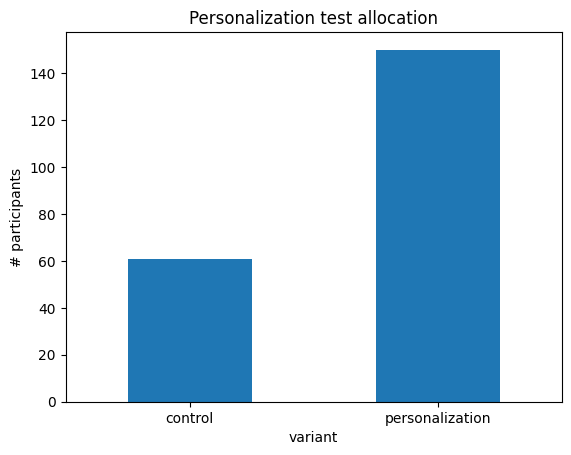

In [364]:
# هاد لازموا تغير من ايميل ل عام
email = marketing[marketing['marketing_channel'] == 'Email']
allocation = email.groupby(['variant'])['user_id'].nunique()
allocation.plot(kind='bar')
plt.title('Personalization test allocation')
plt.xticks(rotation = 0)
plt.ylabel('# participants')
plt.show()

Allocation is relatively even, but not exactly the same.(there are statistical tests to determine the likelihood that the difference in allocation is due to random chance)
we can proceed with the assumption that there were no issues in the randomization process.

<h3>Setting up our data to evaluate the test<h3/>

Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.

In [365]:
# Group by user_id and variant
subscribers = marketing.groupby(['user_id','variant'])['converted'].max()
subscribers = pd.DataFrame(subscribers.unstack(level=1))


# create a Series of outcomes for both the control and the personalization variants

# Drop missing values from the control column
control = subscribers['control'].dropna()
# Drop missing values from the personalization column
personalization = subscribers['personalization'].dropna()


# Conversion rates for each variant
print("Control conversion rate:", control.mean())
print("Personalization conversion rate:", personalization.mean())


Control conversion rate: 0.07186002916059155
Personalization conversion rate: 0.14718162839248433


Treatment performance compared to the control: 
The first question you'll want to answer when running a test is, "what's the lift?". In this case, what this means is, "Was the conversion rate higher for the treatment and by how much?". 
Lift is calculated by taking the difference between the treatment conversion rate and the control conversion rate divided by the control conversion rate. 
The result is the relative percent difference of treatment compared to control.

In [366]:
import random
from  scipy.stats import ttest_ind
from  scipy.stats import t
from statsmodels.stats.power import TTestIndPower


In [412]:
def cohen_d(param_one, param_two):
    std = np.sqrt((np.std(param_one)**2 + np.std(param_two)**2)/2)
    mean = np.mean(param_two) - np.mean(param_one)
    return np.abs(mean/std)

def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean (a)
    b_mean = np.mean (b)
    # Calculate the lift using a_mean and b_mean
    if b_mean > a_mean:
        lift = (b_mean-a_mean)/a_mean
    else:
        lift = (a_mean-b_mean)/b_mean
    return lift

def confidence_interval(a, b, alpha = 0.05):
    # To find the T critical value
    df = len (a)+len(b)-2
    CV = t.ppf(q= 1-alpha/2 ,df= df)
    CI = CV * np.sqrt( (np.std(a)**2)/len(a) + (np.std(b)**2)/len(b))
    return CI

def select_sample_size (effect_size , power = 0.8 ,nobs1= None, ratio = 1.0, alpha = 0.05):
    # Calculate the required sample size
    sample_size = TTestIndPower().solve_power(effect_size = effect_size, power = power, nobs1 = nobs1, ratio = ratio, alpha = alpha)
    return sample_size

def power_test (a ,b, alpha = 0.05):
    effect_size = cohen_d(a,b)
    power = TTestIndPower().power(effect_size=effect_size, nobs1 = len(a), alpha=alpha, ratio=1.0, alternative='two-sided') 
    return power

def t_test(param_one ,param_two, equal_var=False  , alpha = 0.05):
    
    # 1 calculate effect size
    effect_size = cohen_d(param_one,param_two)

    # 2 calculate power of test
    sample = select_sample_size(effect_size)

    # 3 select sample size
    control_sample = random.choices(param_one, k= round (sample))
    personalization_sample = random.choices(param_two, k= round (sample))

    # 4 calculate t-test
    t = ttest_ind( control_sample ,personalization_sample, equal_var=False , alternative='two-sided')
    
    # 5 calculate final power
    power = power_test (control_sample ,personalization_sample) 

    # 6 calculate confidence interval
    CI = confidence_interval(param_one ,param_two)
    # Calculate the lift using our lift function
    liftd = lift(param_one ,param_two)
    return (t  , power , liftd ,CI) 


In [420]:
t_test(control, personalization)

(Ttest_indResult(statistic=-2.7944492977888147, pvalue=0.005401489383734122),
 0.7980508156935197,
 1.0481710084414992,
 0.012412421067956455)

The personalization variant improved on the control conversion rate by 90.73% That's a good improvement and a very good signal that we should consider running personalized campagins again in the future

Calculate statistical significance: A t-test uses the mean and the sample variance to determine the likelihood that the variation between the two samples occurred by chance.
This conveniently gives us both a t-statistic and a p-value.

Remember, a p-value less than 0.05 is typically considered statistically significant at 95% significance level. 
Since the p-value here is indeed less than 0.05, we can be confident that the difference in conversion rates is statistically significant.

Statistically significant means that the results of a study or experiment are unlikely to be due to chance alone.

A conventional threshold for declaring statistical significance is a p-value of less than 0.051. In other words, if the p-value is less than 0.05, it means that there is less than a 5% chance that the results are due to chance.

***A/B testing & segmentation***

Just like with any other kind of marketing, some treatments are particularly effective on users of a specific engagement level, age, race, or any other of a number of factors. It is important to break down results by various demographics in order to obtain a holistic understanding of the impact of the test. Not all customers are alike!

In [370]:
marketing[marketing['marketing_channel'] == 'Email'].groupby(['variant'])['converted'].mean()

variant
control            0.885246
personalization    0.753333
Name: converted, dtype: float64

In [371]:
email_p = marketing[(marketing['marketing_channel'] == 'Email') & (marketing['variant'] == 'personalization')]
email_c = marketing[(marketing['marketing_channel'] == 'Email') & (marketing['variant'] == 'control')]
email_p.groupby(['date_served'])['converted'].mean().mean()

0.7160794941282745

In [372]:
# توضيح شو الفرق بين لمن بتاخد المتوسط بناءا على الايام او مجموع الاشخاص لاني صارت مشكلة في القيم الكبيرة

In [417]:
def show(percent):
    return str(round(percent*100)) + '%'

def pre_processing(column):
    #-----------------------------------------------------
    personalization = marketing[marketing['variant'] == 'personalization']
    personalization_retention = retention_rate(personalization, ['date_served' , column]).unstack(level=1)
    personalization_convertion = conversion_rate(personalization, ['date_served' , column]).unstack(level=1)
    #-----------------------------------------------------
    control = marketing[marketing['variant'] == 'control']
    control_retention = retention_rate(control, ['date_served' , column]).unstack(level=1)
    control_convertion = conversion_rate(control, ['date_served' , column]).unstack(level=1)
    #-----------------------------------------------------
    report = []
    for category in marketing[column].unique():
        CCR = control_convertion[category].dropna().mean()
        CRR = control_retention[category].dropna().mean()
        PCR = personalization_convertion[category].dropna().mean()
        PRR = personalization_retention[category].dropna().mean()

        t  , power , lift ,CI = t_test(control_convertion[category].dropna() , personalization_convertion[category].dropna()  )

        report.append({"category": category , 
                       'C_RR': show(CRR) ,
                        'P_RR': show(PRR),
                        'C_CR': show(CCR) , 
                        'P_CR': show(PCR),
                        'Lift': show(lift),
                        'CI': '±'+show(CI),
                        'P-value': t.pvalue ,
                        'β': show(1-power),
                        
                        
                        } )
        
    return pd.DataFrame(report)

In [418]:
pre_processing('marketing_channel')

,category,C_RR,P_RR,C_CR,P_CR,Lift,CI,P-value,β
0,Youtube,70%,60%,6%,6%,1%,±3%,0.000803,8%
1,LinkedIn,89%,80%,3%,20%,516%,±9%,0.001856,5%
2,Facebook,95%,66%,6%,24%,322%,±6%,0.000801,0%
3,Instagram,83%,66%,6%,28%,379%,±8%,0.014398,15%
4,Email,83%,91%,83%,72%,16%,±23%,0.003220,16%


In [419]:
pre_processing('age_group')

,category,C_RR,P_RR,C_CR,P_CR,Lift,CI,P-value,β
0,0-18 years,74%,63%,6%,25%,313%,±8%,0.019323,25%
1,19-24 years,77%,70%,7%,33%,395%,±8%,0.039337,37%
2,24-30 years,81%,64%,7%,26%,262%,±8%,0.000804,2%
3,30-36 years,79%,74%,7%,4%,72%,±3%,0.009623,25%
4,36-45 years,74%,90%,6%,5%,17%,±4%,0.038908,46%
5,45-55 years,72%,86%,6%,7%,9%,±5%,0.035342,44%
6,55+ years,82%,79%,9%,8%,10%,±6%,0.364824,85%


1: Provide recommendations about marketing campaigns
This can be done by applying A/B tests on KPIs to the different customer segments.